In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, digamma
import random
import xgboost as xgb
import math
import pandas as pd

In [2]:
plt.rcParams['axes.unicode_minus']=False

In [3]:
feature_dim = 5;
data_size = 200000;
outlier_frac = 0.002
clean_num = int(data_size*(1 - outlier_frac))
outlier_num = int(data_size * outlier_frac)

In [4]:
# 构造协向量的多元正态分布
np.random.seed(0)
var_mean = np.random.choice(range(10), size=feature_dim)
var_covariance = np.eye(feature_dim)

# 生成协变量随机数据
np.random.seed(1)
var_data = np.random.multivariate_normal(var_mean, var_covariance, clean_num)
var_data.shape

(199600, 5)

In [5]:
# 噪声
np.random.seed(2)
noise0 =  np.random.normal(loc=0.0, scale=25.0, size = clean_num)
noise1 =  np.random.normal(loc=0.0, scale=25.0, size = clean_num)
noise0, noise1

(array([-10.41894619,  -1.40667068, -53.40490239, ...,  -6.13230231,
          4.8117234 ,  39.7354261 ]),
 array([ 20.74013021,  10.22914853,  -1.64997084, ...,  41.23469411,
          7.40952653, -22.38456745]))

In [6]:
# 真实的ite
real_ite = var_data[:,0]* var_data[:,2] + np.log(1 + np.exp(var_data[:,1]))
ATE = real_ite.mean()
print('True_ATE is {}'.format(ATE))

True_ATE is 15.800009132365998


In [7]:
# 生成label
import math

b_X = 10 * np.sin(math.pi * var_data[:,0] * var_data[:,1]) + 6 * np.power(var_data[:,2], 2) + 10 * np.abs(var_data[:,3]) + 5 * np.abs(var_data[:,4]) + 50
y0 = b_X + noise0
y1 = b_X + real_ite + noise1

In [8]:
min(y0),max(y0),min(y1),max(y1)

(7.561119624614591, 463.25936425231555, 7.635177612124522, 506.4539063604787)

In [9]:
np.mean(y1)-np.mean(y0)

15.690021801685504

In [10]:
clean_df = pd.DataFrame(var_data, columns=['f0', 'f1', 'f2','f3', 'f4'])

In [11]:
clean_df["y0"] = y0
clean_df["y1"] = y1
clean_df["constant"] = 1
clean_df["true_ite"] = real_ite

In [12]:
clean_df["flag"]=1

In [13]:
clean_df

,f0,f1,f2,f3,f4,y0,y1,constant,true_ite,flag
0,6.624345,-0.611756,2.471828,1.927031,7.865408,133.196588,181.163246,1,16.807582,1
1,2.698461,1.744812,2.238793,3.319039,6.750630,153.544072,173.126994,1,7.947102,1
2,6.462108,-2.060141,2.677583,2.615946,8.133769,114.760927,183.938634,1,17.422775,1
3,3.900109,-0.172428,2.122142,3.042214,7.582815,177.796536,119.084317,1,8.887228,1
4,3.899381,1.144724,3.901591,3.502494,7.900856,180.962888,260.756361,1,16.634864,1
...,...,...,...,...,...,...,...,...,...,...
199595,3.423153,1.614815,1.998324,4.603538,5.376630,183.538354,150.853055,1,8.636810,1
199596,4.931906,-0.649729,3.798108,3.122214,6.297604,248.706000,238.206897,1,19.152059,1
199597,5.187054,-0.750582,3.749438,3.186611,7.378758,200.266670,267.468891,1,19.835224,1
199598,5.150110,0.389471,2.190277,3.740745,7.153721,156.954370,171.739066,1,12.186893,1


In [14]:
int(np.mean(y1) + 4*np.std(y1)), int(np.mean(y1) + 20*np.std(y1))

(392, 1201)

In [15]:
np.random.seed(3)
outlier_x = np.random.multivariate_normal(var_mean, var_covariance, outlier_num)
outlier_y0 = np.random.choice(range(int(np.mean(y1) + 4*np.std(y1)), int(np.mean(y1) + 20*np.std(y1))), size = outlier_num)
outlier_y1 = np.random.choice(range(int(np.mean(y1) + 4*np.std(y1)), int(np.mean(y1) + 20*np.std(y1))), size = outlier_num)
outlier_x,outlier_y0,outlier_y1

(array([[ 6.78862847,  0.43650985,  3.09649747,  1.1365073 ,  6.7226118 ],
        [ 4.64524102, -0.08274148,  2.37299932,  2.95618183,  6.52278197],
        [ 3.68613525,  0.88462238,  3.88131804,  4.70957306,  7.05003364],
        ...,
        [ 4.04900398,  0.71369145,  2.54484762,  4.45427146,  6.68901972],
        [ 6.02737071, -1.06041158,  3.74522099,  1.60199153,  7.07857912],
        [ 3.35106269, -0.17225583,  2.18382372,  1.99675486,  7.21483031]]),
 array([1151,  917,  512, 1034,  986, 1182,  661,  416,  844,  929, 1024,
         944,  888,  943,  842,  731,  802,  480,  963,  618,  903,  699,
         819,  932,  827, 1105,  776, 1006,  971,  503,  611, 1087,  575,
         531,  570,  584,  904, 1082,  835, 1053, 1142,  857,  453, 1138,
        1177,  755,  849, 1070,  984,  410,  867,  426,  629,  546, 1017,
         873,  426, 1183,  836, 1015,  984,  513,  707,  685,  555,  758,
         622,  551,  891, 1142, 1059, 1122, 1146, 1171,  657,  851, 1081,
         957,  75

In [16]:
outlier_df = pd.DataFrame(outlier_x, columns=['f0', 'f1', 'f2','f3', 'f4'])

In [17]:
outlier_df["y0"] = outlier_y0
outlier_df["y1"] = outlier_y1
outlier_df["constant"] = 1
outlier_df["true_ite"] = 0
outlier_df["flag"] = 0
outlier_df

,f0,f1,f2,f3,f4,y0,y1,constant,true_ite,flag
0,6.788628,0.436510,3.096497,1.136507,6.722612,1151,453,1,0,0
1,4.645241,-0.082741,2.372999,2.956182,6.522782,917,1020,1,0,0
2,3.686135,0.884622,3.881318,4.709573,7.050034,512,629,1,0,0
3,4.595323,-0.545360,1.453523,3.982367,5.898932,1034,719,1,0,0
4,3.814953,-0.205650,4.486148,3.236716,5.976215,986,1192,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,6.639037,-0.793380,2.534541,4.083960,4.556685,1036,901,1,0,0
396,3.505927,-0.869458,3.040784,4.043074,8.059517,709,1166,1,0,0
397,4.049004,0.713691,2.544848,4.454271,6.689020,784,786,1,0,0
398,6.027371,-1.060412,3.745221,1.601992,7.078579,947,853,1,0,0


In [18]:
full_df = pd.concat([clean_df,outlier_df])

In [19]:
full_df = full_df.sample(frac=1.0, random_state = 4).reset_index(drop=True)
full_df

,f0,f1,f2,f3,f4,y0,y1,constant,true_ite,flag
0,3.417261,0.640927,3.556110,0.692266,6.348305,156.660465,180.121074,1,13.216261,1
1,4.267410,-0.991125,2.561731,2.847410,5.727259,107.256757,147.698074,1,11.247613,1
2,5.702182,0.684219,3.659991,3.696304,7.064315,185.704386,244.103131,1,21.962601,1
3,5.595090,0.318177,5.297593,3.400343,6.674924,255.888506,312.009805,1,30.505345,1
4,4.073269,-1.562788,1.705456,4.983928,7.997875,157.922388,169.224470,1,7.137031,1
...,...,...,...,...,...,...,...,...,...,...
199995,6.842244,0.905134,3.191648,3.326736,7.534883,187.423305,202.626389,1,23.082841,1
199996,5.419629,-0.771019,2.529847,1.946916,6.826409,176.350190,165.786912,1,14.091006,1
199997,4.942366,-0.868987,1.841071,3.602418,8.100039,162.095373,163.350602,1,9.449461,1
199998,7.503251,1.019567,2.879978,2.754395,5.889813,167.678609,169.755680,1,22.936800,1


In [20]:
d1 = full_df.sample(frac = 0.5)
d2 = full_df[~full_df.index.isin(d1.index)]

train_feature = ["f0","f1","f2","f3","f4"]
xgb_1 = xgb.XGBRegressor(n_jobs=16,objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 80)

X_train1 = d1[train_feature].values
metric_label1 = ((d1["y0"]+d1["y1"])/2).values.flatten()
xgb_1.fit(X_train1, metric_label1)

xgb_2 = xgb.XGBRegressor(n_jobs=16,objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 80)
X_train2 = d2[train_feature].values
metric_label2 = ((d2["y0"]+d2["y1"])/2).values.flatten()
xgb_2.fit(X_train2, metric_label2)

Y_pred_2 = xgb_1.predict(X_train2)
Y_pred_1 = xgb_2.predict(X_train1)
Y_pred_1,Y_pred_2

(array([180.73859, 189.8041 , 163.43416, ..., 229.08188, 215.3969 ,
        223.59264], dtype=float32),
 array([178.61511, 154.97781, 211.62611, ..., 194.21677, 148.7715 ,
        150.43275], dtype=float32))

In [21]:
d1["metric_pred"] = Y_pred_1
d2["metric_pred"] = Y_pred_2
df_ml = pd.concat([d1,d2])

/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
cov_cuped = np.cov(df_ml["f2"],df_ml["y0"])
theta_cuped = cov_cuped[0,1] / cov_cuped[0,0]
cor_cuped = cov_cuped[0,1] / (np.sqrt(cov_cuped[0,0]) * np.sqrt(cov_cuped[1,1]))
print('cuped_theta:{:.5f}, correlation:{:.5f}'.format(theta_cuped,cor_cuped))

cuped_theta:35.82823, correlation:0.64761


In [23]:
cov_cupac = np.cov(df_ml["metric_pred"],df_ml["y0"])
theta_cupac = cov_cupac[0,1] / cov_cupac[0,0]
cor_cupac = cov_cupac[0,1] / (np.sqrt(cov_cupac[0,0]) * np.sqrt(cov_cupac[1,1]))
print('cupac_theta:{:.5f}, correlation:{:.5f}'.format(theta_cupac,cor_cupac))

cupac_theta:0.95888, correlation:0.69321


In [24]:
df_ml

,f0,f1,f2,f3,f4,y0,y1,constant,true_ite,flag,metric_pred
113651,2.092846,0.718461,2.686724,4.543182,7.574411,148.175600,163.925967,1,6.738459,1,180.738586
142461,4.396451,0.896675,3.630277,1.577194,7.341103,152.346462,198.134913,1,17.199127,1,189.804092
181348,4.379604,-0.795492,2.606322,3.898540,5.744152,133.141769,185.309003,1,11.787160,1,163.434158
36343,6.257378,-1.772702,3.967936,3.190681,7.131230,244.748894,253.662018,1,24.985770,1,226.900589
59398,4.761484,-0.458827,3.104164,4.324605,6.161282,162.599337,205.321637,1,15.270247,1,192.753372
...,...,...,...,...,...,...,...,...,...,...,...
199993,5.244747,-0.197554,1.387430,1.371253,7.230093,175.576642,125.865283,1,7.875961,1,115.461029
199994,5.946015,-0.850074,5.101431,3.740605,7.000135,259.532957,296.827908,1,30.689029,1,294.060303
199995,6.842244,0.905134,3.191648,3.326736,7.534883,187.423305,202.626389,1,23.082841,1,194.216766
199996,5.419629,-0.771019,2.529847,1.946916,6.826409,176.350190,165.786912,1,14.091006,1,148.771500


In [25]:
ATE2 = df_ml["true_ite"].mean()
ATE2

15.768409114101264

In [26]:
(df_ml["y1"]-df_ml["y0"]).mean()

15.644871758082104

In [27]:
def dim_cuped_cupac(df_population,simulations_num,sample_size):
    true_abate_list = []
    dim_abate_list = []
    cuped_abate_list = []
    cupac_abate_list = []
    cuped_mean = df_population["f2"].mean()
    cupac_mean = df_population["metric_pred"].mean()
    n = df_population.shape[0]
    for i in range(1, simulations_num+1):
        # print("-"*100)
        print('第{}次采样'.format(i))

        ## 采样取数
        df_ab = df_population.sample(sample_size, random_state=i)
        
        np.random.seed(i)
        random_array = np.random.choice(range(2), sample_size)
        
        df_ab["treat"] = random_array
        df_ab["metric_view"] = df_ab["treat"]*df_ab["y1"] + (1-df_ab["treat"])*df_ab["y0"]
        df_ab["metric_cuped"] = df_ab["metric_view"] - (df_ab["f2"] - cuped_mean) * theta_cuped
        df_ab["metric_cupac"] = df_ab["metric_view"] - (df_ab["metric_pred"] - cupac_mean) * theta_cupac

        df_ab_agg = df_ab.groupby(["treat"]).agg({"metric_view":"mean", "metric_cuped":"mean", "metric_cupac":"mean"})  



        ## DIM_ATE
        dim_ate = df_ab_agg.loc[1, "metric_view"] - df_ab_agg.loc[0, "metric_view"]
        dim_abate_list.append(dim_ate)
        # print('dim_ate:{}'.format(dim_ate))

        ## CUPED_ATE
        cuped_ate = df_ab_agg.loc[1, "metric_cuped"] - df_ab_agg.loc[0, "metric_cuped"]
        cuped_abate_list.append(cuped_ate)
        # print('cuped_ate:{}'.format(cuped_ate))

        ## CUPAC_ATE
        cupac_ate = df_ab_agg.loc[1, "metric_cupac"] - df_ab_agg.loc[0, "metric_cupac"]
        cupac_abate_list.append(cupac_ate)
        # print('cupac_ate:{}'.format(cupac_ate))


        # true_abate = df_ab[df_ab["flag"]==1]["true_ite"].mean()
        true_abate = df_ab["true_ite"].mean()
        # print('TRUE_ATE:{}'.format(true_abate))
        true_abate_list.append(true_abate)
    return true_abate_list, dim_abate_list,cuped_abate_list,cupac_abate_list

In [ ]:
true_list1, dim_list1,cuped_list1,cupac_list1 = dim_cuped_cupac(df_ml,1000,20000)

In [28]:
true_list2, dim_list2,cuped_list2,cupac_list2 = dim_cuped_cupac(df_ml,5000,20000)

第1次采样
第2次采样
第3次采样
第4次采样
第5次采样
第6次采样
第7次采样
第8次采样
第9次采样
第10次采样
第11次采样
第12次采样
第13次采样
第14次采样
第15次采样
第16次采样
第17次采样
第18次采样
第19次采样
第20次采样
第21次采样
第22次采样
第23次采样
第24次采样
第25次采样
第26次采样
第27次采样
第28次采样
第29次采样
第30次采样
第31次采样
第32次采样
第33次采样
第34次采样
第35次采样
第36次采样
第37次采样
第38次采样
第39次采样
第40次采样
第41次采样
第42次采样
第43次采样
第44次采样
第45次采样
第46次采样
第47次采样
第48次采样
第49次采样
第50次采样
第51次采样
第52次采样
第53次采样
第54次采样
第55次采样
第56次采样
第57次采样
第58次采样
第59次采样
第60次采样
第61次采样
第62次采样
第63次采样
第64次采样
第65次采样
第66次采样
第67次采样
第68次采样
第69次采样
第70次采样
第71次采样
第72次采样
第73次采样
第74次采样
第75次采样
第76次采样
第77次采样
第78次采样
第79次采样
第80次采样
第81次采样
第82次采样
第83次采样
第84次采样
第85次采样
第86次采样
第87次采样
第88次采样
第89次采样
第90次采样
第91次采样
第92次采样
第93次采样
第94次采样
第95次采样
第96次采样
第97次采样
第98次采样
第99次采样
第100次采样
第101次采样
第102次采样
第103次采样
第104次采样
第105次采样
第106次采样
第107次采样
第108次采样
第109次采样
第110次采样
第111次采样
第112次采样
第113次采样
第114次采样
第115次采样
第116次采样
第117次采样
第118次采样
第119次采样
第120次采样
第121次采样
第122次采样
第123次采样
第124次采样
第125次采样
第126次采样
第127次采样
第128次采样
第129次采样
第130次采样
第131次采样
第132次采样
第133次采样
第134次采样
第135次采样
第136次采样
第137次采样
第138次采样
第139

In [30]:
def mlrate_state(df_population,simulations_num,sample_size,gv,sigmma):
    mlrate_abate_list = []
    student_abate_list = []
    n = df_population.shape[0]
    for i in range(1, simulations_num+1):
        # print("-"*100)
        # print('第{}次采样'.format(i))
        
        ## 采样取数
        df_ab = df_population.sample(sample_size, random_state=i)
        
        np.random.seed(i)
        random_array = np.random.choice(range(2), sample_size)
        # print("random_array:{}".format(random_array))
        
        df_ab["treat"] = random_array
        df_ab["metric_view"] = df_ab["treat"]*df_ab["y1"] + (1-df_ab["treat"])*df_ab["y0"]
        
        cupac_mean = df_ab["metric_pred"].mean()
        
        ## MLRATE
        df_ab["cross"]=(df_ab["metric_pred"] - cupac_mean)* df_ab["treat"]
        array_ab = df_ab[["constant", "treat", "metric_pred", "cross","metric_view"]].values
        matrix_ab = array_ab[:,:4]
        y =  array_ab[:,4]
        
        ols_para_iter = np.dot(np.linalg.inv(np.dot(matrix_ab.T,matrix_ab)),np.dot(matrix_ab.T,y))
        # print('最小二乘解:{}'.format(ols_para_iter))
        # print('MLRATE:{}'.format(ols_para_iter[1]))
        mlrate_abate_list.append(ols_para_iter[1])
        
        
        a0, a1, a2 = 10,10,10
    
        t = array_ab[:,1]
        x2 = array_ab[:,2]
        
       
        # free_energy = [0]
        for iter in range(10000):

            params = [a0, a1, a2]

            # E-step
            ga = gv / 2 + 1 / 2
            gb = gv / 2 + (y - a0 - a1*t - a2*x2)**2 / (2 * sigmma)
            gu = ga / gb

            # M-step
            sum0 = sum((y - a1*t - a2*x2) * gu)
            sum00 = sum(gu)
            a0= sum0 / sum00

            sum1 = sum((y - a0 - a2*x2)*t * gu)
            sum11 = sum(gu * t**2)
            a1 = sum1 / sum11

            sum2 = sum((y - a0 - a1*t)*x2 * gu)
            sum22 = sum(gu * x2**2)
            a2 = sum2 / sum22


            sum7 = sum((y - a0 - a1*t - a2*x2)**2 * gu)
            sigmma = sum7 / sample_size
            
            if np.allclose(params, [a0, a1, a2], atol=1e-4):
                # print('t估计第{}次迭代，a0:{:.5f}, a1:{:.5f}, a2:{:5f}, sigmma:{:.5f}'.format(iter, a0, a1, a2, sigmma))
                student_abate_list.append(a1)
                # print('Students T估计:{}'.format(a1))
                break
    return mlrate_abate_list, student_abate_list

In [ ]:
mlrate_list1, student_list1 = mlrate_state(df_ml,1000,20000,10,500)

----------------------------------------------------------------------------------------------------
第1次采样
最小二乘解:[ 4.61593377 15.72534394  0.93376805  0.16167761]
MLRATE:15.725343940216305
t估计第320次迭代，a0:-13.47540, a1:16.06207, a2:1.022164, sigmma:600.89519
Students T估计:16.062066383119745
----------------------------------------------------------------------------------------------------
第2次采样
最小二乘解:[ 2.53476733 15.41370052  0.94633041  0.12581543]
MLRATE:15.413700515460732
t估计第331次迭代，a0:-12.84263, a1:15.89417, a2:1.021529, sigmma:584.10491
Students T估计:15.894169050877915
----------------------------------------------------------------------------------------------------
第3次采样
最小二乘解:[-1.2929747  15.55658805  0.96591348  0.11666111]
MLRATE:15.556588049044137
t估计第318次迭代，a0:-14.70914, a1:15.70760, a2:1.032471, sigmma:585.73433
Students T估计:15.70760005063433
----------------------------------------------------------------------------------------------------
第4次采样
最小二乘解:[ 0.83549038 16.28606

In [ ]:
mlrate_list2, student_list2 = mlrate_state(df_ml,5000,20000,10,500)

In [34]:
def Eval_CI(ate_list,target):
    cover_cnt, simulations_num = 0, len(ate_list)
    for i in range(simulations_num):
        if np.abs(ate_list[i]-target) <= 1.96*np.std(ate_list):
            cover_cnt += 1
    return cover_cnt / simulations_num

In [35]:
def ate_result(true_abate_list,dim_abate_list,cuped_abate_list,cupac_abate_list,mlrate_abate_list,student_abate_list,target):
    l1, l2, l3, l4, l5, l6 = len(true_abate_list), len(dim_abate_list),len(cuped_abate_list),len(cupac_abate_list),len(mlrate_abate_list),len(student_abate_list)
    print("The simulations number of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:{},{},{},{},{},{}".format(l1, l2, l3, l4, l5,l6))
    m1, m2, m3, m4, m5, m6 = np.mean(true_abate_list), np.mean(dim_abate_list), np.mean(cuped_abate_list),np.mean(cupac_abate_list),np.mean(mlrate_abate_list), np.mean(student_abate_list)
    print("The simulations mean of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:{:.5f},{:.5f},{:.5f},{:.5f},{:.5f},{:.5f}".format(m1, m2, m3, m4, m5, m6))
    std1, std2, std3, std4, std5, std6 = np.std(true_abate_list), np.std(dim_abate_list), np.std(cuped_abate_list), np.std(cupac_abate_list), np.std(mlrate_abate_list), np.std(student_abate_list)
    print("The simulations std of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:{:.5f},{:.5f},{:.5f},{:.5f},{:.5f},{:.5f}".format(std1, std2, std3, std4, std5, std6))
    var1, var2, var3, var4, var5, var6 = np.var(true_abate_list), np.var(dim_abate_list),np.var(cuped_abate_list),np.var(cupac_abate_list), np.var(mlrate_abate_list), np.var(student_abate_list)
    print("The simulations var of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:{:.5f},{:.5f},{:.5f},{:.5f},{:.5f},{:.5f}".format(var1, var2, var3, var4, var5, var6))
    
    v1 = (var2 - var3)/var2
    v2 = (var2 - var4)/var2
    v3 = (var2 - var5)/var2
    v4 = (var2 - var6)/var2
    print("The reduction of var with CUPED,CUPAC,MLRATE,STUDENT'S_T:{:.5f},{:.5f},{:.5f},{:.5f}".format(v1, v2, v3, v4))
    
    ci1, ci2, ci3, ci4, ci5, ci6 = Eval_CI(true_abate_list,target), Eval_CI(dim_abate_list,target),Eval_CI(cuped_abate_list,target),Eval_CI(cupac_abate_list,target),Eval_CI(mlrate_abate_list,target),Eval_CI(student_abate_list,target)
    print("The empirical coverage of the 95% CI of TrueATE DIM, CUPED, CUPAC, MLRATE, STUDENT'S_T:{:.5f},{:.5f},{:.5f},{:.5f},{:.5f},{:.5f}".format(ci1, ci2, ci3, ci4, ci5, ci6))
    
    plt.plot(range(len(true_abate_list)),true_abate_list,label='true_abate')
    plt.plot(range(len(dim_abate_list)),dim_abate_list,label='dim_ate')
    plt.plot(range(len(cuped_abate_list)),cuped_abate_list,label='cuped_ate')
    plt.plot(range(len(cupac_abate_list)),cupac_abate_list,label='cupac_ate')
    plt.plot(range(len(mlrate_abate_list)),mlrate_abate_list,label='mlrate_ate')
    plt.plot(range(len(student_abate_list)),student_abate_list,label='student_ate')
    
    
    # plt.xlabel("simulations_number", fontdict={'size': 16})
    # plt.ylabel("the ate of {}".format(metric), fontdict={'size': 16})
    # plt.title("ATE OF {}".format(metric), fontdict={'size': 20})
    plt.legend()
    plt.show()
    return 

The simulations number of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:1000,1000,1000,1000,1000,1000
The simulations mean of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:15.76961,15.64740,15.63134,15.63987,15.63935,15.70372
The simulations std of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:0.03937,0.80188,0.58772,0.54935,0.54688,0.36173
The simulations var of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:0.00155,0.64301,0.34541,0.30179,0.29908,0.13085
The reduction of var with CUPED,CUPAC,MLRATE,STUDENT'S_T:0.46282,0.53066,0.53487,0.79651
The empirical coverage of the 95% CI of TrueATE DIM, CUPED, CUPAC, MLRATE, STUDENT'S_T:0.88400,0.94900,0.93800,0.94000,0.94200,0.94400


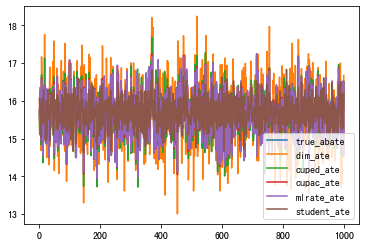

In [34]:
ate_result(true_list1, dim_list1,cuped_list1,cupac_list1,mlrate_list1, student_list1, ATE)

The simulations number of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:1000,1000,1000,1000,1000,1000
The simulations mean of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:15.76961,15.64740,15.63134,15.63987,15.63935,15.70372
The simulations std of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:0.03937,0.80188,0.58772,0.54935,0.54688,0.36173
The simulations var of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:0.00155,0.64301,0.34541,0.30179,0.29908,0.13085
The reduction of var with CUPED,CUPAC,MLRATE,STUDENT'S_T:0.46282,0.53066,0.53487,0.79651
The empirical coverage of the 95% CI of TrueATE DIM, CUPED, CUPAC, MLRATE, STUDENT'S_T:0.95300,0.95100,0.94500,0.94000,0.93900,0.94800


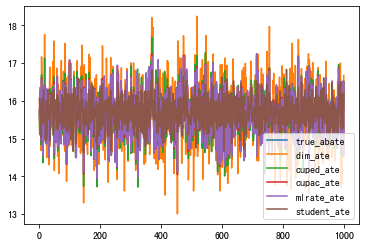

In [35]:
ate_result(true_list1, dim_list1,cuped_list1,cupac_list1,mlrate_list1, student_list1, ATE2)

The simulations number of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:5000,5000,5000,5000,5000,5000
The simulations mean of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:15.76815,15.64358,15.64130,15.64471,15.64480,15.70000
The simulations std of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:0.04023,0.78740,0.57829,0.54391,0.54298,0.36307
The simulations var of TrueATE,DIMATE,CUPED,CUPAC,MLRATE,STUDENT'S_T:0.00162,0.62000,0.33442,0.29584,0.29483,0.13182
The reduction of var with CUPED,CUPAC,MLRATE,STUDENT'S_T:0.46061,0.52284,0.52447,0.78738
The empirical coverage of the 95% CI of TrueATE DIM, CUPED, CUPAC, MLRATE, STUDENT'S_T:0.95220,0.94680,0.94500,0.94020,0.94180,0.94800


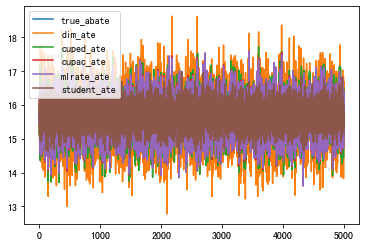

In [36]:
ate_result(true_list2, dim_list2, cuped_list2, cupac_list2, mlrate_list2, student_list2, ATE2)

In [72]:
df_ml["true_ite"].mean()

15.491004386352907

In [54]:
def plot_exp(figure_name,ylim_config,dim_aaate_list, cuped_aaate_list, cupac_aaate_list, mlrate_aaate_list, student_aaate_list):
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import MultipleLocator
    simu_n = 1000
    plt.rc('font',family='Times New Roman')
    # plt.figure(facecolor='white')
    # plt.axes(facecolor='white')
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'

    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth('0.8')

    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth('0.8')

    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth('0.8')


    ax.spines['right'].set_visible(True)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth('0.8')



    ground_truth = [15.64438066740591]*simu_n

    plt.plot(range(simu_n),dim_aaate_list, label='DIM',color = (.23,.46,.69))
    # plt.plot(range(len(linear_dim_results_2)),linear_dim_results,label='linear_dim')
    plt.plot(range(simu_n),cupac_aaate_list, label='CUPAC',color=(.94,.52,.21))
    plt.plot(range(simu_n),cuped_aaate_list, label='CUPED',color = (.32,.62,.24))
    

    # plt.plot(range(len(linear_cupac_results_2)),linear_cupac_results,label='linear_cupac')
    # plt.plot(range(simu_n),ord_data['Student_OREDR_2W'].values, label='STATE',color='#111f2c')

    plt.plot(range(simu_n), mlrate_aaate_list, color=(.77,.22,.20), label='MLRATE')
    # plt.plot(range(simu_n),ord_data[index_name[4]+suffix].values, label='STATE',color=(.66,.56,.79))
    plt.plot(range(simu_n),student_aaate_list, label='STATE',color=(.66,.56,.79))
    plt.plot(range(simu_n),ground_truth, label='Ground truth', color='black')

    plt.xlabel('The number of simulations', fontsize=18, fontweight='bold')
    plt.ylabel('ATE', fontsize=18, fontweight='bold')

    plt.xticks(fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16, fontweight='bold')

    plt.minorticks_on()


    # plt.xlim(-3e5, 4.75e6)
    # plt.ylim(-0.12, 0.2)
    plt.ylim(ylim_config[0],ylim_config[1])

    # x_major_locator=MultipleLocator(5e5)
    # # y_major_locator=MultipleLocator(0.15)
    # y_major_locator=MultipleLocator(0.2)
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)

    plt.grid(True)

    plt.legend(prop={'size':14, 'weight':'bold'}, ncol=2, loc=9)

    # plt.savefig('simulation_exp{}.pdf'.format(figure_name), format='pdf', bbox_inches = 'tight')

    plt.show()
    return 

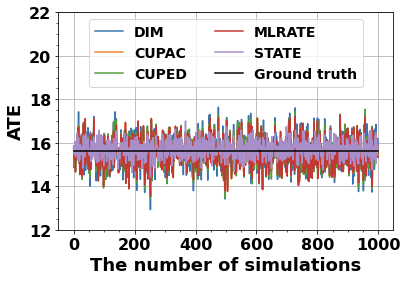

In [55]:
plot_exp("dirty_data",[12,22], dim_list1,cuped_list1,cupac_list1,mlrate_list1, student_list1)